In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
data_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [4]:
data_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [5]:
data_true.duplicated().value_counts()

False    21211
True       206
Name: count, dtype: int64

In [6]:
data_fake.duplicated().value_counts()

False    23478
True         3
Name: count, dtype: int64

In [7]:
data_true.drop_duplicates(inplace= True)
data_fake.drop_duplicates(inplace= True)

In [8]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB


In [9]:
data_true.describe()

,title,text,subject,date
count,21211,21211,21211,21211
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,"CHARLESTON, S.C. (Reuters) - Long viewed by th...",politicsNews,"December 6, 2017"
freq,14,2,11220,166


In [10]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


In [11]:
data_fake.describe()

,title,text,subject,date
count,23478,23478,23478,23478
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [12]:
data_fake['class'] = 0
data_true['class'] = 1

In [13]:
data_fake.sample(5)

,title,text,subject,date,class
15880,POLITICAL HACK RIHANNA SINGS “We are the new A...,Corporate sponsors like Coke should think agai...,politics,"Apr 5, 2015",0
5355,WATCH: Trump Supporter Just Mocked Hispanics ...,And Republicans wonder why they are not doing ...,News,"July 23, 2016",0
15569,[VIDEO] YEP…GUN-CONTROL BILL SAID THAT TODAY: ...,You can t have people walking around with gun...,politics,"Jun 14, 2015",0
5589,"Trump Fan Puts Disgusting, Racist Float Of Ob...","Don Christy, who claims he s neither a Republi...",News,"July 6, 2016",0
21726,IF YOU CROSS OUR BORDERS ILLEGALLY….YOU CAN NO...,We re going to have people who are bilingual ...,left-news,"May 18, 2015",0


In [14]:
data_true.sample(5)

,title,text,subject,date,class
14713,Thai court looks into lawsuit against owner of...,BANGKOK (Reuters) - A Thai criminal court on M...,worldnews,"November 15, 2017",1
539,"In Thanksgiving message, Trump hails military ...","PALM BEACH, FLORIDA (Reuters) - U.S. President...",politicsNews,"November 23, 2017",1
17776,Pro-Catalonia anarchists enter Spanish embassy...,ATHENS (Reuters) - Self-proclaimed anarchists ...,worldnews,"October 11, 2017",1
16736,Austrian conservative Kurz says needs more tim...,VIENNA (Reuters) - Austrian conservative leade...,worldnews,"October 23, 2017",1
8257,No. 2 House Democrat opposes temporary gov't s...,WASHINGTON (Reuters) - U.S. Representative Ste...,politicsNews,"September 6, 2016",1


In [15]:
data_true["text"] = data_true["text"].replace("(Reuters)","",regex=True)
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1


In [16]:
data_true.shape, data_fake.shape

((21211, 5), (23478, 5))

In [17]:
data_fake_unseen = data_fake.tail(10)
for i in range(23468,23458,-1):
     data_fake.drop([i] , axis = 0, inplace =True)

data_true_unseen = data_true.tail(10)
for i in range(21203,21193,-1):
     data_true.drop([i] , axis = 0, inplace =True)

In [18]:
data_true.shape, data_fake.shape

((21201, 5), (23468, 5))

In [19]:
data_merged = pd.concat([data_fake,data_true],axis = 0)
data_merged.sample(10)

,title,text,subject,date,class
17327,WATCH JUDGE ORDER PUNK WEARING “POLICE LIE” T-...,The hate for our law enforcement is at an all ...,Government News,"May 18, 2015",0
10843,BRILLIANT! SCHOLAR VICTOR DAVIS HANSON Utterly...,This is by far the best analysis yet of the en...,politics,"May 18, 2017",0
15065,TRUMP WAS RIGHT! Audit Reveals State Dept. Cyb...,New documents appear to show a pattern of dete...,politics,"Oct 19, 2015",0
5183,Trump's immigration opening falls flat with ke...,WASHINGTON () - President Donald Trump’s signa...,politicsNews,"March 2, 2017",1
8114,Popular Michelle Obama courts young people for...,"FAIRFAX, Va. () - Democratic presidential nomi...",politicsNews,"September 16, 2016",1
5408,"Senior House Democrats want briefing on Flynn,...",WASHINGTON () - The House of Representatives D...,politicsNews,"February 16, 2017",1
12523,WOW! TX Congressman On IMPEACHMENT And REMOVAL...,Fox News host Bill Hemmer asked Congressman Mi...,politics,"Nov 2, 2016",0
5204,Factbox: Main themes of Trump's speech to Cong...,() - President Donald Trump opened the door to...,politicsNews,"March 1, 2017",1
19684,BREAKING: SECRET RECORDINGS About Clinton Foun...,"Wow Peter Schweizer, author of the chilling ...",left-news,"Nov 3, 2016",0
11487,SMOKING GUN? First FISA Request on Trump Tower...,"As we said yesterday, Trump would not have mad...",politics,"Mar 5, 2017",0


In [20]:
# Define a dictionary to map old names to new names
subject_mapping = {
    'News': 'News',
    'politics': 'politics',
    'Government News': 'politics',
    'left-news': 'politics',
    'US_News': 'News',
    'Middle-east': 'News'
}

# Use the map function to replace the old names with the new names
data_fake['subject'] = data_fake['subject'].map(subject_mapping)

In [21]:
data_fake['subject'].value_counts()

subject
politics    12867
News        10601
Name: count, dtype: int64

In [22]:
subject_mapping = {
    'politicsNews': 'politics',
    'worldnews': 'News',
}
data_true['subject'] = data_true['subject'].map(subject_mapping)
data_true['subject'].value_counts()

subject
politics    11220
News         9981
Name: count, dtype: int64

In [23]:
data_merged_modified = pd.concat([data_fake,data_true],axis = 0)
data_merged_modified.sample(10)

,title,text,subject,date,class
4427,"Trump Comes Unglued, Continues Miss Universe ...",Donald Trump s team keeps trying to make the p...,News,"September 30, 2016",0
11269,Chelsea Clinton stands her mother's ground in ...,"MANCHESTER, N.H. () - U.S. Democratic presiden...",politics,"January 13, 2016",1
16595,WHOA! CLINTON GRIFTERS BAGGED $100 Million Fro...,The Clinton grifters have been at this scam fo...,politics,"May 25, 2016",0
13782,Pakistani Islamists call off protests over bla...,ISLAMABAD () - A hardline Pakistani Islamist g...,News,"November 26, 2017",1
21316,North Korea tests short-range missiles as Sout...,SEOUL/WASHINGTON () - North Korea fired severa...,News,"August 25, 2017",1
7358,Former Los Angeles Mayor Villaraigosa enters C...,() - Former Los Angeles Mayor and former Calif...,politics,"November 10, 2016",1
16957,Fire destroys landmark hotel in Myanmar's larg...,YANGON () - One person was killed on Thursday ...,News,"October 19, 2017",1
9301,Trump will reopen controversial Trump Universi...,WASHINGTON () - U.S. Republican presidential c...,politics,"June 2, 2016",1
4143,WATCH: Trump Supporter Accuses Hillary Of Sex...,Donald Trump s new strategy to spin away from ...,News,"October 18, 2016",0
6039,Trump says U.S.-Mexico border wall to come soo...,WASHINGTON () - U.S. President Donald Trump sa...,politics,"January 25, 2017",1


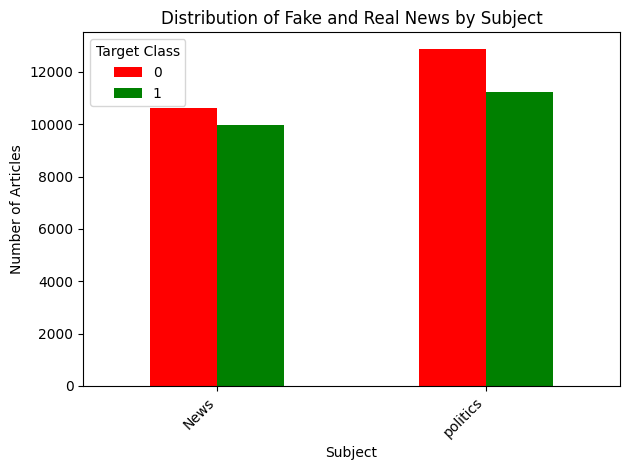

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is loaded into a pandas DataFrame named 'data'

# Group data by subject and target class, count occurrences
data_grouped = data_merged_modified.groupby(['subject', 'class']).size().unstack(fill_value=0)

# Create the bar chart
data_grouped.plot(kind='bar', stacked=False, color=['red', 'green'])  # Adjust colors for fake/real
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.title('Distribution of Fake and Real News by Subject')
plt.xticks(rotation=45, ha='right')  # Rotate subject labels for readability
plt.legend(title='Target Class')
plt.tight_layout()
plt.show()



In [25]:
df_req = data_merged_modified.drop(['title','subject','date'],axis = 1)  

In [26]:
df_req.isnull().sum()

text     0
class    0
dtype: int64

In [27]:
df_req.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [28]:
import string
import re
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [29]:
df_req['text'] = df_req['text'].apply(wordopt)

In [30]:
df_req.sample(5)

,text,class
18041,a clueless cnn reporter trying to interview a ...,0
22871,image air defense and satellite tracking cen...,0
5460,washington congressional democrats on tue...,1
19441,maricopa county sheriff joe arpaio says a new ...,0
11268,washington president barack obama warned ...,1


In [31]:
x = df_req['text']
y = df_req['class']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(xv_train,y_train)

LogisticRegression()

In [37]:
pred_LR = LR.predict(xv_test)

In [38]:
LR.score(xv_test, y_test)

0.9825393982808023

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5901
           1       0.98      0.98      0.98      5267

    accuracy                           0.98     11168
   macro avg       0.98      0.98      0.98     11168
weighted avg       0.98      0.98      0.98     11168



In [41]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [42]:
pred_dt =DT.predict(xv_test)

In [43]:
DT.score(xv_test, y_test)

0.9510207736389685

In [44]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5901
           1       0.96      0.94      0.95      5267

    accuracy                           0.95     11168
   macro avg       0.95      0.95      0.95     11168
weighted avg       0.95      0.95      0.95     11168



In [45]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [46]:
pred_gb = GB.predict(xv_test)

In [47]:
GB.score(xv_test, y_test)

0.967317335243553

In [48]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5901
           1       0.96      0.97      0.97      5267

    accuracy                           0.97     11168
   macro avg       0.97      0.97      0.97     11168
weighted avg       0.97      0.97      0.97     11168



In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
pred_rf = RF.predict(xv_test)

In [51]:
RF.score(xv_test, y_test)

0.9787786532951289

In [52]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5901
           1       0.98      0.98      0.98      5267

    accuracy                           0.98     11168
   macro avg       0.98      0.98      0.98     11168
weighted avg       0.98      0.98      0.98     11168



In [53]:
import xgboost as xgb

# Assuming xv_train and y_train are your training data (features and target variable)

# Create an XGBoost classifier object
model = xgb.XGBClassifier(objective='binary:logistic', random_state=0)  # Adjust 'objective' for multi-class

# Fit the model to your training data
model.fit(xv_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [54]:
pred_Xgb = model.predict(xv_test)

In [55]:
model.score(xv_test, y_test)

0.9917621776504298

In [56]:
print(classification_report(y_test, pred_Xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5901
           1       0.99      0.99      0.99      5267

    accuracy                           0.99     11168
   macro avg       0.99      0.99      0.99     11168
weighted avg       0.99      0.99      0.99     11168



In [90]:
import pandas as pd
  # You should import the vectorization module


def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

# Define the manual_testing function
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)  # Assuming wordopt is defined elsewhere
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)  # Assuming vectorization is defined and working correctly
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    pred_Xgb = model.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {} \nXGb Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_GB[0]),
        output_label(pred_RF[0]),
        output_label(pred_Xgb[0])
        
    ))



In [97]:
# news_text =data_fake_unseen['text'].iloc[8]
news_text ="The Biden administration said Friday more time is needed to weigh a potential menthol cigarette ban, dealing a blow to public health advocates with another delay while citing “an immense amount of feedback” generated by the proposal.The news comes ahead of November’s hotly contested presidential election and amid concerns that a long-anticipated menthol ban could harm President Joe Biden’s support among Black voters, with menthol cigarettes disproportionately used by the Black community in the U.S.This rule has garnered historic attention and the public comment period has yielded an immense amount of feedback, including from various elements of the civil rights and criminal justice movement,” Health and Human Services Secretary Xavier Becerra said in a statement Friday. “It’s clear that there are still more conversations to have, and that will take significantly more time."

In [98]:

manual_testing(news_text)



LR Prediction: Real News 
DT Prediction: Fake News 
GB Prediction: Real News 
RF Prediction: Real News 
XGb Prediction: Real News


In [99]:
import pickle

# Assuming 'model' is the name of your model object
# Assuming 'filename.pkl' is the desired filename for your pickled model
with open('Xgb.pkl', 'wb') as file:
    pickle.dump(model, file)


In [100]:
with open('RF.pkl', 'wb') as file:
    pickle.dump(RF, file)
    

In [101]:
with open('LR.pkl', 'wb') as file:
    pickle.dump(LR, file)

In [102]:
with open('DT.pkl', 'wb') as file:
    pickle.dump(DT, file)

In [103]:
with open('GB.pkl', 'wb') as file:
    pickle.dump(GB, file)

In [106]:
# Pickle the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorization, f)

In [ ]:

!streamlit run NewsApp.py